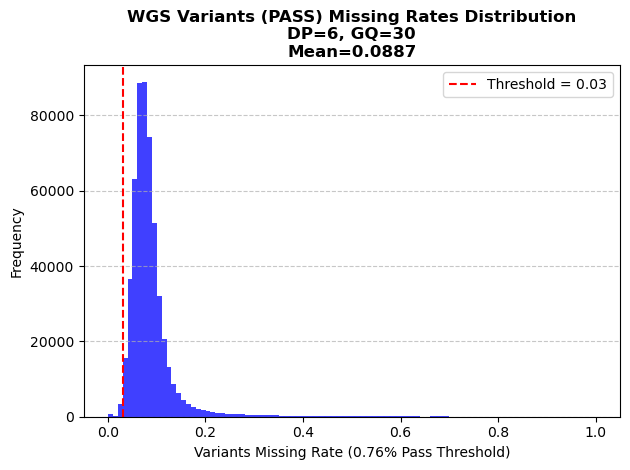

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import pickle
import os

DP = 6
GQ = 30
miss_threshold = 0.03

work_dir = "/LARGE0/gr10478/b37974/Pulmonary_Hypertension/cteph_agp3k/tuning.concordance/04.dp_gq_vmiss"
dict_file = os.path.join(work_dir, f"DP{DP}_GQ{GQ}_vmissing_rate.pkl")

with open(dict_file, "rb") as f:
    data_dict = pickle.load(f)
    
# Extract the keys and values from the dictionary
keys = list(data_dict.keys())
values = list(data_dict.values())
import matplotlib.pyplot as plt

# Extract all_missing_rate from values
all_missing_rate = values[0][0]
average_missing_rate = values[0][1]

# Calculate the percentage of records below the miss_threshold
below_threshold_percentage = (all_missing_rate < miss_threshold).mean() * 100

# Plot histogram
plt.hist(all_missing_rate, bins=100, alpha=0.75, color='blue')
plt.axvline(x=miss_threshold, color='red', linestyle='--', linewidth=1.5, label=f'Threshold = {miss_threshold}')
plt.title(f'WGS Variants (PASS) Missing Rates Distribution\nDP={DP}, GQ={GQ}\nMean={average_missing_rate:.4f}', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel(f'Variants Missing Rate ({below_threshold_percentage:.2f}% Pass Threshold)')
plt.ylabel('Frequency')
plt.style.use('default')
plt.tight_layout()
plt.legend()
plt.show()

In [77]:
dp_range = range(1, 31)     
gq_values = [10, 20, 30] 

work_dir = "/LARGE0/gr10478/b37974/Pulmonary_Hypertension/cteph_agp3k/tuning.concordance/04.dp_gq_vmiss"

result_data = []

for dp in dp_range:
    for gq in gq_values:
        file_path = os.path.join(work_dir, f"DP{dp}_GQ{gq}_vmissing_rate.pkl")
        if os.path.exists(file_path):
            with open(file_path, "rb") as f:
                data = pickle.load(f)
                mean_vmiss = list(data.values())[0][1]  # Extract the mean missing rate
                result_data.append({'DP': dp, 'GQ': gq, 'MEAN_VMISS': mean_vmiss})

# Create a DataFrame to store the results
vmiss_df = pd.DataFrame(result_data)

In [78]:
summary_15x_list = []
summary_30x_list = []
summary_all_list = []

work_dir = "/LARGE0/gr10478/b37974/Pulmonary_Hypertension/cteph_agp3k/tuning.concordance/02.concordance_summary"

for dp in dp_range:
    for gq in gq_values:
        filename = f"DP{dp}_GQ{gq}_dict.pkl"
        filepath = os.path.join(work_dir, filename)
        if not os.path.exists(filepath):
            print(f"Warning: {filename} not found.")
            continue
        
        with open(filepath, 'rb') as f:
            result_dict = pickle.load(f)

        # create keys for 15X, 30X, and ALL
        key1 = frozenset([f'DP{dp}', f'GQ{gq}', '15X'])
        key2 = frozenset([f'DP{dp}', f'GQ{gq}', '30X'])
        key3 = frozenset([f'DP{dp}', f'GQ{gq}', 'ALL'])

        # extract summaries
        try:
            summary_15x_list.append(result_dict[key1][2])
            summary_30x_list.append(result_dict[key2][2])
            summary_all_list.append(result_dict[key3][2])
        except KeyError as e:
            print(f"Missing key in {filename}: {e}")

# Concatenate the lists into DataFrames
summary_15x = pd.concat(summary_15x_list, axis=0)
summary_30x = pd.concat(summary_30x_list, axis=0)
summary_all = pd.concat(summary_all_list, axis=0)

In [79]:
# Merge summary_all and vmiss_df on DP and GQ
summary_all = pd.merge(summary_all, vmiss_df, on=['DP', 'GQ'])

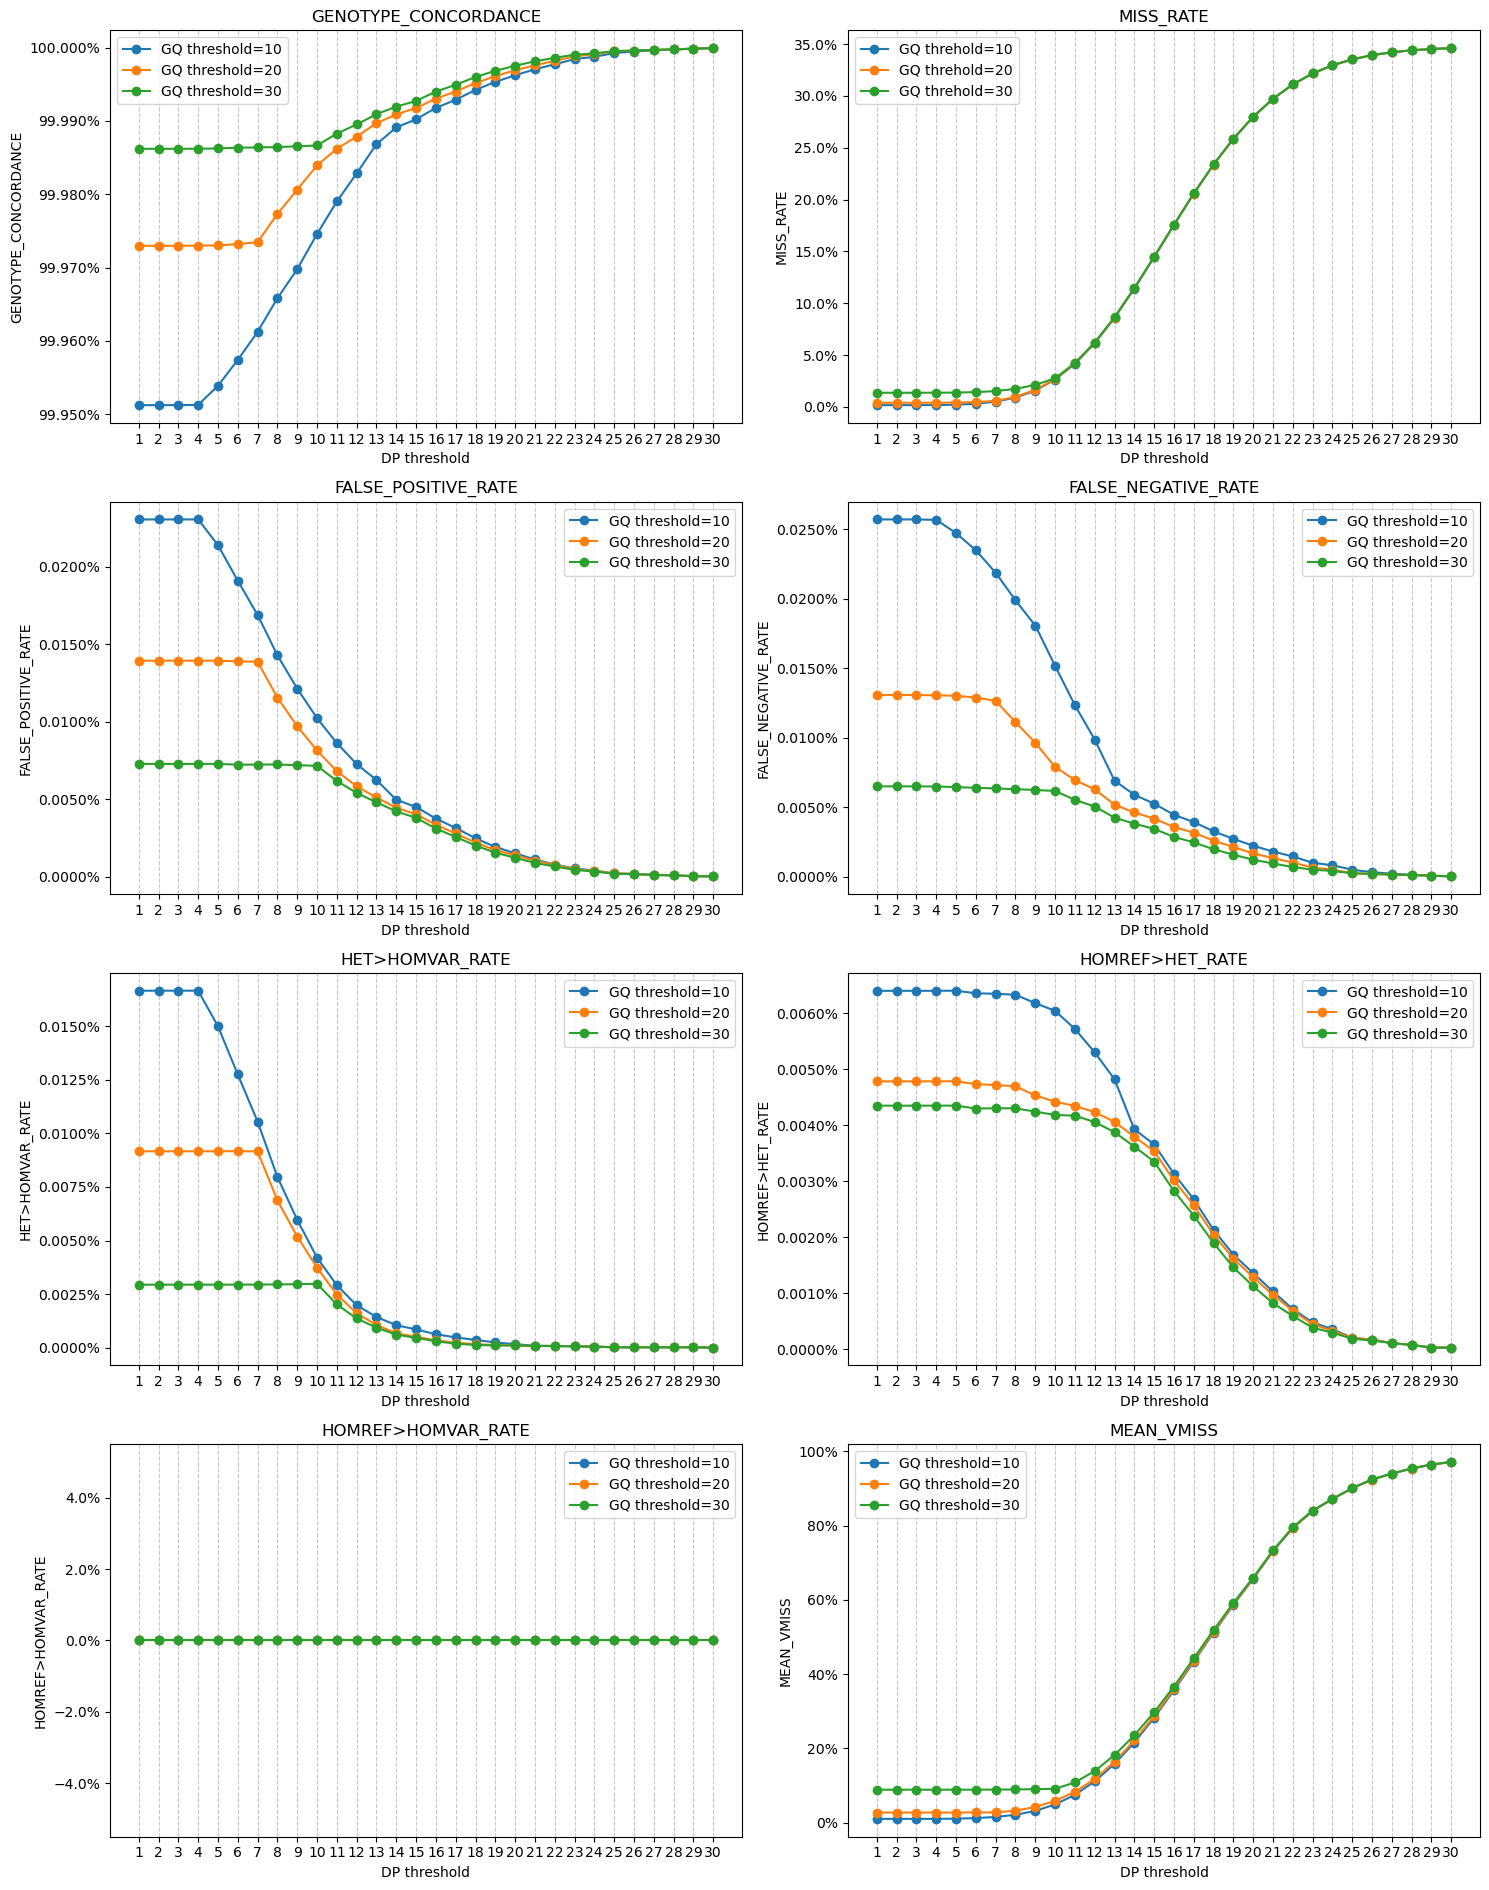

In [71]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def plot_concordance(summary_df, dp_range, gq_values):
    
    plt.style.use('default')
    fig, axs = plt.subplots(4, 2, figsize=(15, 19))
    
    # GENOTYPE_CONCORDANCE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[0, 0].plot(subset['DP'], subset['GENOTYPE_CONCORDANCE'], label=f'GQ threshold={gq}', marker="o")
    axs[0, 0].set_xlabel('DP threshold')
    axs[0, 0].set_ylabel('GENOTYPE_CONCORDANCE')
    axs[0, 0].set_title('GENOTYPE_CONCORDANCE')
    axs[0, 0].set_xticks(dp_range)
    axs[0, 0].grid(axis='x', linestyle='--', alpha=0.7)
    axs[0, 0].legend()
    
    axs[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # MISS_RATE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[0, 1].plot(subset['DP'], subset['MISS_RATE'], label=f'GQ threhold={gq}', marker="o")
    axs[0, 1].set_xlabel('DP threshold')
    axs[0, 1].set_ylabel('MISS_RATE')
    axs[0, 1].set_title('MISS_RATE')
    axs[0, 1].set_xticks(dp_range)
    axs[0, 1].grid(axis='x', linestyle='--', alpha=0.7)
    axs[0, 1].legend()
    
    axs[0, 1].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # FALSE_POSITIVE_RATE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[1, 0].plot(subset['DP'], subset['FALSE_POSITIVE_RATE'], label=f'GQ threshold={gq}', marker="o")
    axs[1, 0].set_xlabel('DP threshold')
    axs[1, 0].set_ylabel('FALSE_POSITIVE_RATE')
    axs[1, 0].set_title('FALSE_POSITIVE_RATE')
    axs[1, 0].set_xticks(dp_range)
    axs[1, 0].grid(axis='x', linestyle='--', alpha=0.7)
    axs[1, 0].legend()
    
    axs[1, 0].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # FALSE_NEGATIVE_RATE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[1, 1].plot(subset['DP'], subset['FALSE_NEGATIVE_RATE'], label=f'GQ threshold={gq}', marker="o")
    axs[1, 1].set_xlabel('DP threshold')
    axs[1, 1].set_ylabel('FALSE_NEGATIVE_RATE')
    axs[1, 1].set_title('FALSE_NEGATIVE_RATE')
    axs[1, 1].set_xticks(dp_range)
    axs[1, 1].grid(axis='x', linestyle='--', alpha=0.7)
    axs[1, 1].legend()
    
    axs[1, 1].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # HET>HOMVAR_RATE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[2, 0].plot(subset['DP'], subset['HET>HOMVAR_RATE'], label=f'GQ threshold={gq}', marker="o")
    axs[2, 0].set_xlabel('DP threshold')
    axs[2, 0].set_ylabel('HET>HOMVAR_RATE')
    axs[2, 0].set_title('HET>HOMVAR_RATE')
    axs[2, 0].set_xticks(dp_range)
    axs[2, 0].grid(axis='x', linestyle='--', alpha=0.7)
    axs[2, 0].legend()
    
    axs[2, 0].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # HOMREF>HET_RATE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[2, 1].plot(subset['DP'], subset['HOMREF>HET_RATE'], label=f'GQ threshold={gq}', marker="o")
    axs[2, 1].set_xlabel('DP threshold')
    axs[2, 1].set_ylabel('HOMREF>HET_RATE')
    axs[2, 1].set_title('HOMREF>HET_RATE')
    axs[2, 1].set_xticks(dp_range)
    axs[2, 1].grid(axis='x', linestyle='--', alpha=0.7)
    axs[2, 1].legend()
    
    axs[2, 1].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # HOMREF>HOMVAR_RATE vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[3, 0].plot(subset['DP'], subset['HOMREF>HOMVAR_RATE'], label=f'GQ threshold={gq}', marker="o")
    axs[3, 0].set_xlabel('DP threshold')
    axs[3, 0].set_ylabel('HOMREF>HOMVAR_RATE')
    axs[3, 0].set_title('HOMREF>HOMVAR_RATE')
    axs[3, 0].set_xticks(dp_range)
    axs[3, 0].grid(axis='x', linestyle='--', alpha=0.7)
    axs[3, 0].legend()
    
    axs[3, 0].yaxis.set_major_formatter(PercentFormatter(1.0))

    # MEAN_VMISS vs DP
    for gq in gq_values:
        subset = summary_df[summary_df['GQ'] == gq]
        axs[3, 1].plot(subset['DP'], subset['MEAN_VMISS'], label=f'GQ threshold={gq}', marker="o")
    axs[3, 1].set_xlabel('DP threshold')
    axs[3, 1].set_ylabel('MEAN_VMISS')
    axs[3, 1].set_title('MEAN_VMISS')
    axs[3, 1].set_xticks(dp_range)
    axs[3, 1].grid(axis='x', linestyle='--', alpha=0.7)
    axs[3, 1].legend()
    
    axs[3, 1].yaxis.set_major_formatter(PercentFormatter(1.0))
    
    
    plt.tight_layout()
    plt.show()

plot_concordance(summary_all, dp_range, gq_values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


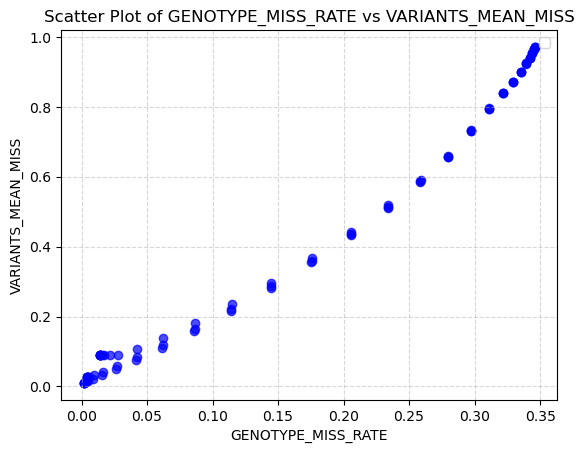

In [111]:
plt.scatter(summary_all['MISS_RATE'], summary_all['MEAN_VMISS'], alpha=0.7, color='blue')
plt.title('Scatter Plot of GENOTYPE_MISS_RATE vs VARIANTS_MEAN_MISS')
plt.xlabel('GENOTYPE_MISS_RATE')
plt.ylabel('VARIANTS_MEAN_MISS')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

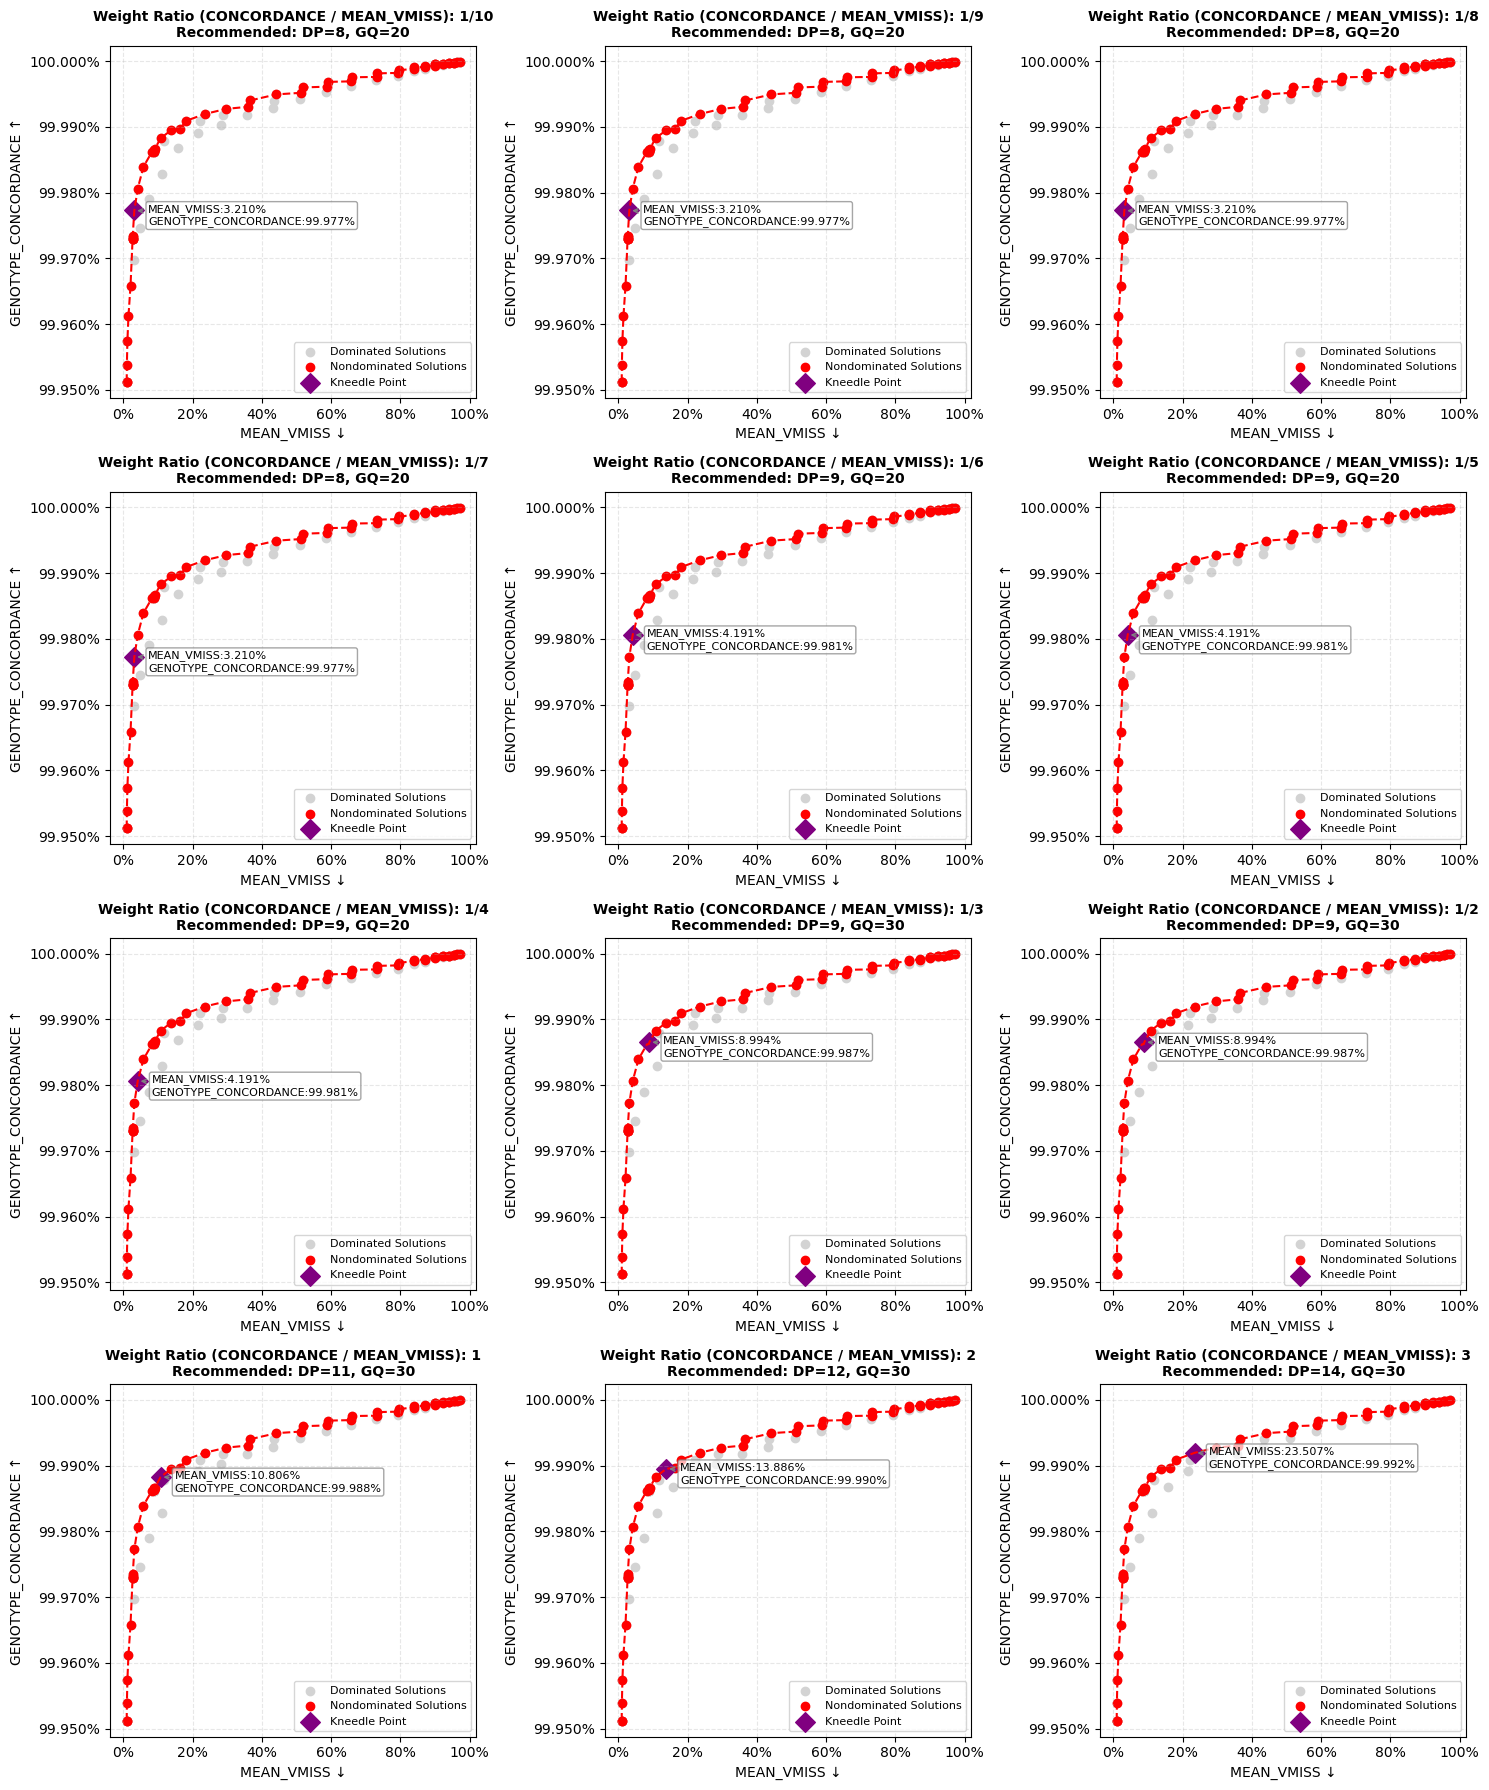

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator
from fractions import Fraction

# summary_all = summary_all[summary_all['GQ'] == 20]

# === Step 1: Identify Pareto Front ===
def find_pareto_front(df, metric1_col='GENOTYPE_CONCORDANCE', metric2_col='MEAN_VMISS',
                      maximize_metric1=True, maximize_metric2=False):
    m1 = df[metric1_col].values
    m2 = df[metric2_col].values
    is_efficient = np.ones(len(df), dtype=bool)
    for i in range(len(df)):
        if is_efficient[i]:
            better_m1 = m1 >= m1[i] if maximize_metric1 else m1 <= m1[i]
            better_m2 = m2 >= m2[i] if maximize_metric2 else m2 <= m2[i]
            strictly_better_m1 = m1 > m1[i] if maximize_metric1 else m1 < m1[i]
            strictly_better_m2 = m2 > m2[i] if maximize_metric2 else m2 < m2[i]
            is_dominated = (better_m1 & better_m2) & (strictly_better_m1 | strictly_better_m2)
            is_dominated[i] = False
            if np.any(is_dominated):
                is_efficient[i] = False
    return pd.Series(is_efficient, index=df.index)

# === Step 2: Kneedle 拐点检测（标准化后处理） ===
def find_kneedle_tradeoff_point(df, x_col='MEAN_VMISS', y_col='GENOTYPE_CONCORDANCE',
                                 curve='concave', direction='increasing', S=1.0, weight_x=1.0, weight_y=1.0):
    df_unique = df[[x_col, y_col, 'DP', 'GQ']].drop_duplicates().sort_values(by=x_col)
    x = df_unique[x_col].values
    y = df_unique[y_col].values

    # 标准化 (Kneedle 会自动处理)
    scaler = MinMaxScaler()
    xy_scaled = scaler.fit_transform(np.column_stack((x, y)))
    x_scaled = xy_scaled[:, 0]
    y_scaled = xy_scaled[:, 1]

    # 使用 Kneedle
    kneedle = KneeLocator(x, y, curve=curve, direction=direction, S=S, weight_x=weight_x, weight_y=weight_y)

    if kneedle.knee is not None:
        # 正确查找 knee 对应的索引
        knee_indices = np.where(x == kneedle.knee)[0]
        if len(knee_indices) > 0 and all(idx < len(x) for idx in knee_indices):
            knee_index = knee_indices[0]
            x_real = x[knee_index]
            y_real = y[knee_index]
            dp = df_unique['DP'].iloc[knee_index]
            gq = df_unique['GQ'].iloc[knee_index]
            return x_real, y_real, dp, gq, scaler, kneedle
        else:
            # 如果找不到有效的 knee 点，返回 None
            return None, None, None, None, scaler, kneedle
    else:
        return None, None, None, None, scaler, kneedle

# === Step 3: 加载数据（你需要提前准备 summary_all） ===

# summary_all['GENOTYPE_CONCORDANCE'] = summary_all['GENOTYPE_CONCORDANCE'].round(10)
# summary_all['MISS_RATE'] = summary_all['MISS_RATE'].round(10)

# === Step 4: 获取 Pareto 前沿 ===
pareto_mask = find_pareto_front(summary_all)
pareto_df_sorted = summary_all[pareto_mask].sort_values(by='MEAN_VMISS')

# === Step 5: Kneedle 拐点检测（合成组图） ===
weight_miss = 1.0

weights = [1/10, 1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1, 2, 3]

# 创建3x3的子图
plt.close('all')
fig, axes = plt.subplots(4, 3, figsize=(15, 18))

for i, weight_concord in enumerate(weights):
    weight_miss = 1.0

    # 查找 Kneedle 点
    x_k, y_k, dp_k, gq_k, scaler, kneedle_obj = find_kneedle_tradeoff_point(
        pareto_df_sorted,
        x_col='MEAN_VMISS',
        y_col='GENOTYPE_CONCORDANCE',
        curve='concave',
        direction='increasing',
        S=1.0,
        weight_x=weight_miss,
        weight_y=weight_concord
    )

    ax = axes[i // 3, i % 3]

    # 背景点（所有解）
    ax.scatter(summary_all['MEAN_VMISS'], summary_all['GENOTYPE_CONCORDANCE'],
               c='lightgray', label='Dominated Solutions')

    # Pareto 前沿点
    ax.scatter(pareto_df_sorted['MEAN_VMISS'], pareto_df_sorted['GENOTYPE_CONCORDANCE'],
               c='red', label='Nondominated Solutions')

    ax.plot(pareto_df_sorted['MEAN_VMISS'], pareto_df_sorted['GENOTYPE_CONCORDANCE'], 'r--')

    # 标记 Kneedle 点
    if x_k is not None:
        ax.scatter(x_k, y_k, color='purple', s=100, marker='D', label='Kneedle Point')

        # 找 summary_all 中离 Kneedle 最近的点
        distances = np.sqrt((summary_all['MEAN_VMISS'] - x_k) ** 2 +
                            (summary_all['GENOTYPE_CONCORDANCE'] - y_k) ** 2)
        nearest_idx = distances.idxmin()
        x_nearest = summary_all.loc[nearest_idx, 'MEAN_VMISS']
        y_nearest = summary_all.loc[nearest_idx, 'GENOTYPE_CONCORDANCE']

        # 注释该点
        ax.annotate(
            f"MEAN_VMISS:{x_nearest:.3%}\nGENOTYPE_CONCORDANCE:{y_nearest:.3%}",
            xy=(x_nearest, y_nearest),
            xytext=(10, -10),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='gray'),
            fontsize=8,
            bbox=dict(boxstyle="round,pad=0.2", fc="w", ec="gray", alpha=0.7)
        )

        ax.set_title(f"Weight Ratio (CONCORDANCE / MEAN_VMISS): {Fraction(weight_concord).limit_denominator()}\n"
                    f"Recommended: DP={dp_k}, GQ={gq_k}", fontsize=10, fontweight='bold')
    else:
        ax.set_title(f"Weight Ratio: {Fraction(weight_concord).limit_denominator()}\nNo Kneedle Point",
                     fontsize=10, fontweight='bold')

    # 图形美化
    ax.set_xlabel("MEAN_VMISS ↓", fontsize=10)
    ax.set_ylabel("GENOTYPE_CONCORDANCE ↑", fontsize=10)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(fontsize=8)
    

# 自动优化布局并显示图像
plt.tight_layout()
plt.show()

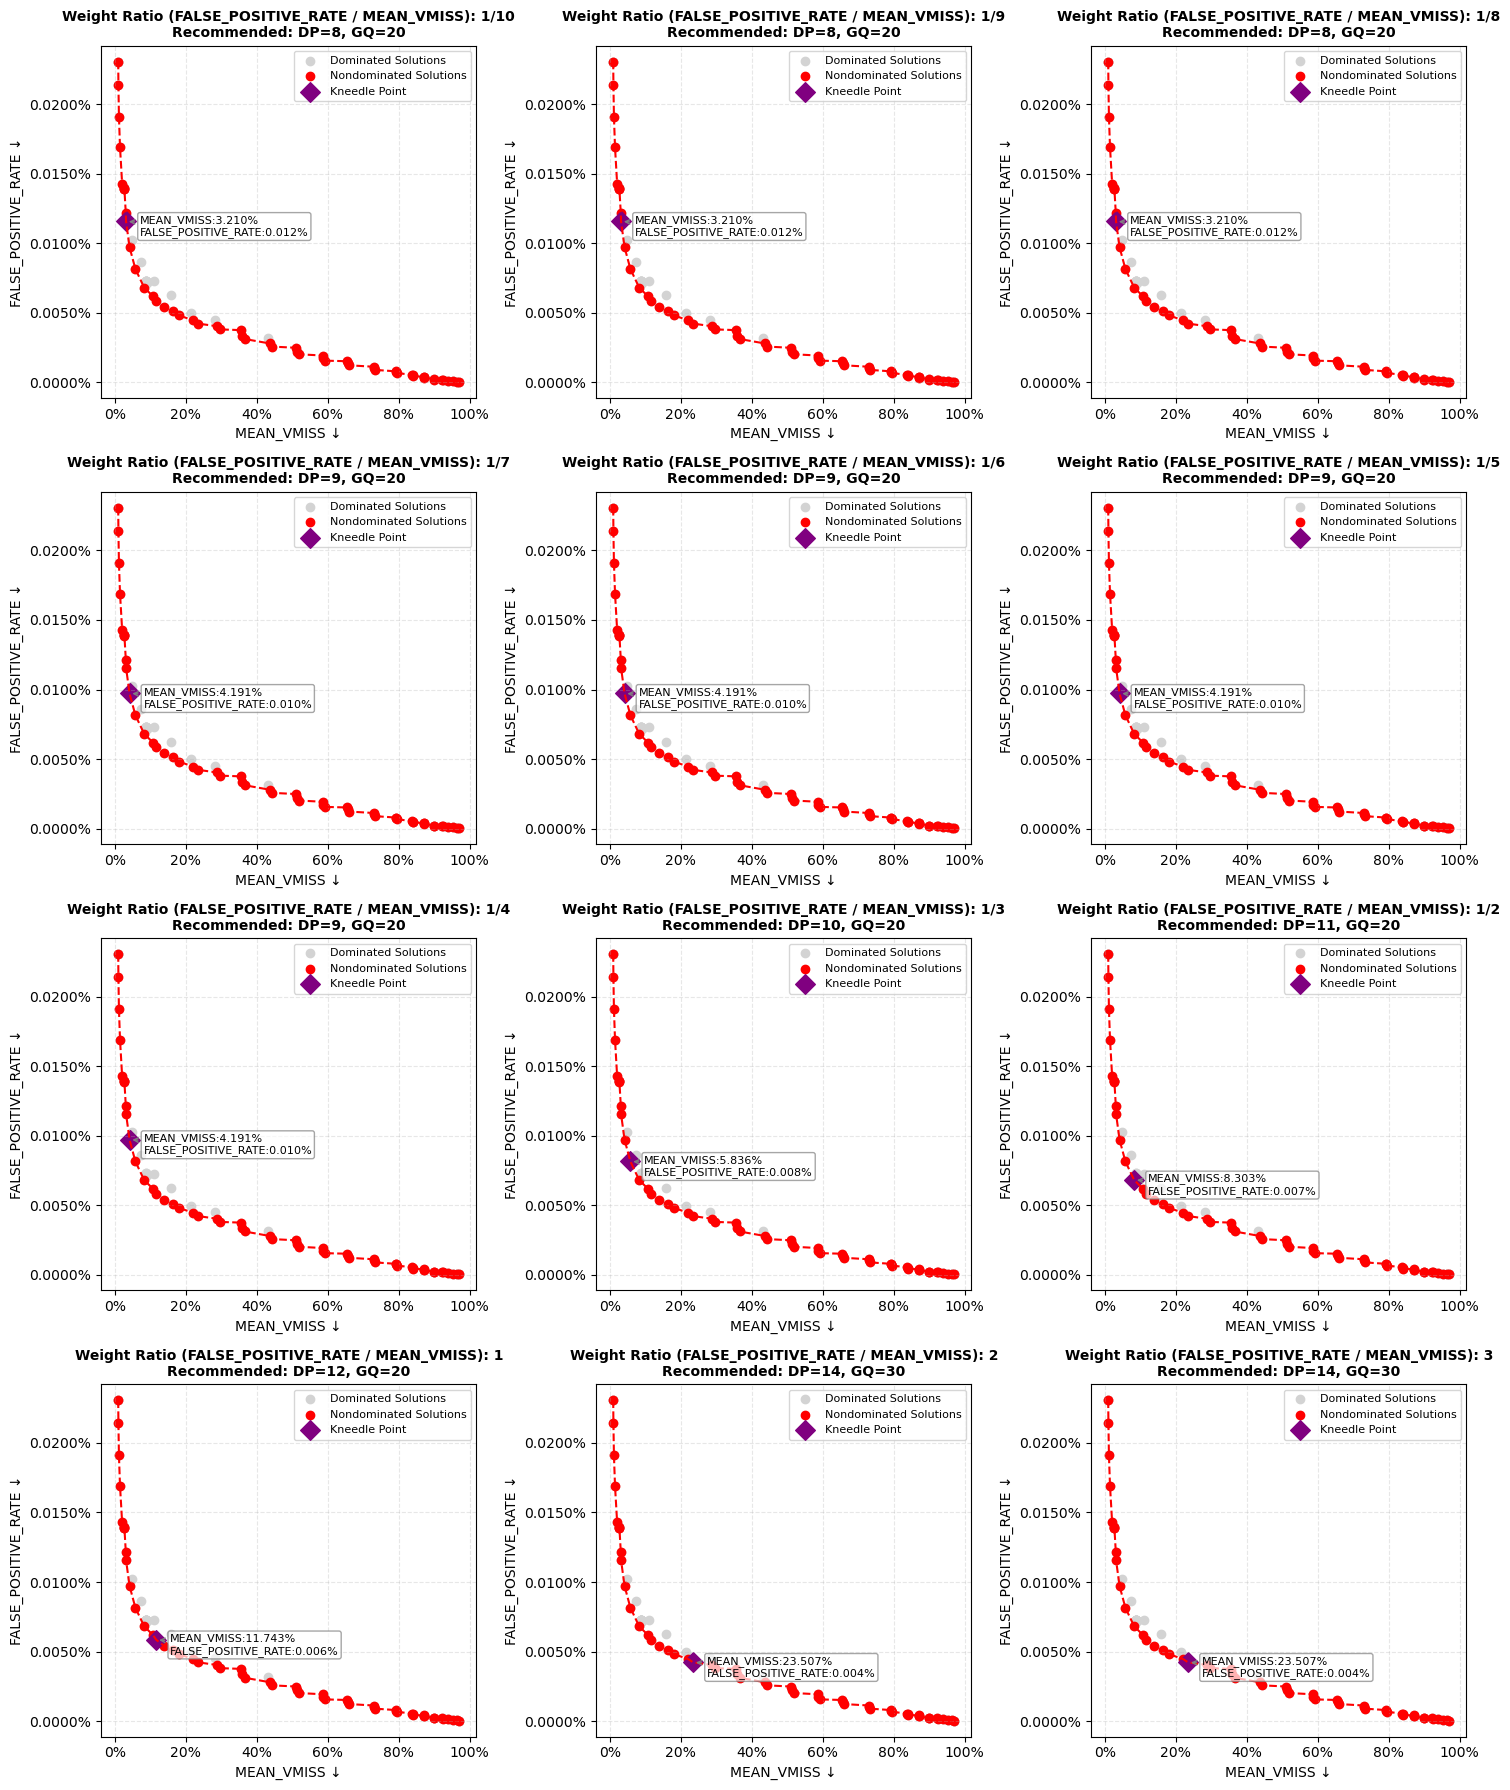

In [119]:
# === Step 4: 获取 Pareto 前沿 ===
pareto_mask = find_pareto_front(summary_all, metric1_col='FALSE_POSITIVE_RATE', metric2_col='MEAN_VMISS',
                                 maximize_metric1=False, maximize_metric2=False)
pareto_df_sorted = summary_all[pareto_mask].sort_values(by='MEAN_VMISS')

# === Step 5: Kneedle 拐点检测（合成组图） ===
weight_miss = 1.0

weights = [1/10, 1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1, 2, 3]

# 创建3x3的子图
plt.close('all')
fig, axes = plt.subplots(4, 3, figsize=(15, 18))

for i, weight_concord in enumerate(weights):
    weight_miss = 1.0

    # 查找 Kneedle 点
    x_k, y_k, dp_k, gq_k, scaler, kneedle_obj = find_kneedle_tradeoff_point(
        pareto_df_sorted,
        x_col='MEAN_VMISS',
        y_col='FALSE_POSITIVE_RATE',
        curve='convex',
        direction='decreasing',
        S=1.0,
        weight_x=weight_miss,
        weight_y=weight_concord
    )

    ax = axes[i // 3, i % 3]

    # 背景点（所有解）
    ax.scatter(summary_all['MEAN_VMISS'], summary_all['FALSE_POSITIVE_RATE'],
               c='lightgray', label='Dominated Solutions')

    # Pareto 前沿点
    ax.scatter(pareto_df_sorted['MEAN_VMISS'], pareto_df_sorted['FALSE_POSITIVE_RATE'],
               c='red', label='Nondominated Solutions')

    ax.plot(pareto_df_sorted['MEAN_VMISS'], pareto_df_sorted['FALSE_POSITIVE_RATE'], 'r--')

    # 标记 Kneedle 点
    if x_k is not None:
        ax.scatter(x_k, y_k, color='purple', s=100, marker='D', label='Kneedle Point')

        # 找 summary_all 中离 Kneedle 最近的点
        distances = np.sqrt((summary_all['MEAN_VMISS'] - x_k) ** 2 +
                            (summary_all['FALSE_POSITIVE_RATE'] - y_k) ** 2)
        nearest_idx = distances.idxmin()
        x_nearest = summary_all.loc[nearest_idx, 'MEAN_VMISS']
        y_nearest = summary_all.loc[nearest_idx, 'FALSE_POSITIVE_RATE']

        # 注释该点
        ax.annotate(
            f"MEAN_VMISS:{x_nearest:.3%}\nFALSE_POSITIVE_RATE:{y_nearest:.3%}",
            xy=(x_nearest, y_nearest),
            xytext=(10, -10),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='gray'),
            fontsize=8,
            bbox=dict(boxstyle="round,pad=0.2", fc="w", ec="gray", alpha=0.7)
        )

        ax.set_title(f"Weight Ratio (FALSE_POSITIVE_RATE / MEAN_VMISS): {Fraction(weight_concord).limit_denominator()}\n"
                    f"Recommended: DP={dp_k}, GQ={gq_k}", fontsize=10, fontweight='bold')
    else:
        ax.set_title(f"Weight Ratio: {Fraction(weight_concord).limit_denominator()}\nNo Kneedle Point",
                     fontsize=10, fontweight='bold')

    # 图形美化
    ax.set_xlabel("MEAN_VMISS ↓", fontsize=10)
    ax.set_ylabel("FALSE_POSITIVE_RATE ↓", fontsize=10)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(fontsize=8)
    

# 自动优化布局并显示图像
plt.tight_layout()
plt.show()